In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

bats = pd.read_csv("Batting.csv")

In [2]:
bats = bats[bats.yearID == 1990]
bats = bats[bats.AB > 20]
bats = bats.dropna()

Selected year is 1990.

Players with less than 20 at-bats or without batting statistics are excluded

In [3]:
bats["OBP_num"] = bats.H + bats.BB + bats.HBP
bats["OBP_den"] = bats.AB + bats.BB + bats.HBP + bats.SF
bats["OBP"] = bats.OBP_num / bats.OBP_den

On-base percentage calculation

In [4]:
salaries = pd.read_csv("Salaries.csv")
salaries = salaries[salaries.yearID == 1990]
bat_sal = pd.merge(bats, salaries, how="inner", left_on="playerID", right_on="playerID")
bat_sal = bat_sal[["playerID", "OBP", "salary", "AB"]]
bat_sal = bat_sal[bat_sal.OBP > 0.2]
bat_sal = bat_sal.sort("OBP", ascending=False)

Salaries are added. Players with OBP under 0.20 are eliminated (most of those players had 0.00 OBP). Remaining players are ranked by OBP.

In [5]:
league_stats = bat_sal.describe()
league_stats

,OBP,salary,AB
count,450.000000,450.000000,450.000000
mean,0.314817,631432.695556,288.731111
std,0.046129,603730.156144,188.721560
min,0.203125,100000.000000,21.000000
25%,0.283011,137375.000000,112.250000
50%,0.318832,425000.000000,274.000000
75%,0.344553,923750.000000,453.000000
max,0.447761,3200000.000000,642.000000


Summarized data from the rest of the league. 

Of note: Mean OBP is almost exactly median OBP, which suggests a standard distribution of batting performance. However, mean salary is 40% higher than median salary, suggesting a few high earners who bring up the average.

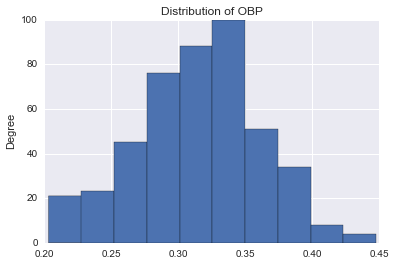

In [6]:
bat_sal.OBP.plot(kind="hist", title="Distribution of OBP")

Yep, OBP distribution is pretty standard.

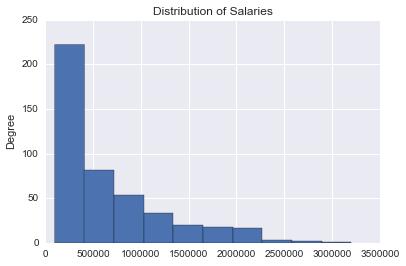

In [7]:
bat_sal.salary.plot(kind="hist", title="Distribution of Salaries")

Salaries are skewed by a few megamillionaires. No matter how good those players are, our budget won't attract overpaid megastars.

We'll cut out players with income over $2,000,000:

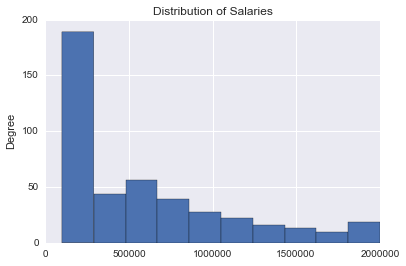

In [8]:
afford = bat_sal[bat_sal.salary <= 2000000]
afford.salary.plot(kind="hist", title="Distribution of Salaries")

Still not that helpful...

In [13]:
afford.head()

,playerID,OBP,salary,AB
115,doranbi02,0.447761,934000,59
171,griffke01,0.443182,510000,77
77,clarkja01,0.441176,2000000,334
122,dykstle01,0.417997,700000,590
275,magadda01,0.417132,395000,451


In [10]:
afford.OBP.corr(afford.salary)

0.22267797229735081

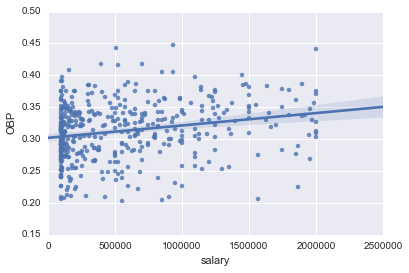

In [47]:
sns.regplot(x=afford.salary, y=afford.OBP, label="OBP vs Salary")

In [36]:
positions = pd.read_csv("Appearances.csv")
positions = positions[positions.yearID == 1990]
add_pos = pd.merge(afford, positions, how="inner", left_on="playerID", right_on="playerID")
names = pd.read_csv("Master.csv")
add_names = pd.merge(add_pos, names, how="inner", left_on="playerID", right_on="playerID")
stats = add_names[["playerID", "OBP", "salary", "AB", "nameFirst", "nameLast", "G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of"]]


In [37]:
stats.head()

,playerID,OBP,salary,AB,nameFirst,nameLast,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of
0,doranbi02,0.447761,934000,59,Bill,Doran,0,0,12,4,0,0,0,0,0
1,doranbi02,0.447761,934000,59,Bill,Doran,0,0,99,0,0,0,0,0,0
2,doranbi02,0.404762,934000,344,Bill,Doran,0,0,12,4,0,0,0,0,0
3,doranbi02,0.404762,934000,344,Bill,Doran,0,0,99,0,0,0,0,0,0
4,griffke01,0.443182,510000,77,Ken,Griffey,0,9,0,0,0,5,0,1,6


In [45]:
salaries = pd.read_csv("Salaries.csv")
salaries.index = salaries.yearID
salaries.describe()

,yearID,salary
count,24758.000000,24758.000000
mean,1999.891752,1932904.790169
std,8.324492,3190333.601862
min,1985.000000,0.000000
25%,1993.000000,260000.000000
50%,2000.000000,525000.000000
75%,2007.000000,2199643.000000
max,2014.000000,33000000.000000
